In [3]:
import numpy as np
import tensorflow as tf

In [4]:
seto_img = 'IRIS/iris-setosa/'
versi_img = 'IRIS/iris-versicolour/'
virgi_img = 'IRIS/iris-virginica/'

In [5]:
w,h = 150, 150
input_shape = (w, h, 3)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [7]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    'IRIS (1)/',
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 421 images belonging to 3 classes.


In [8]:
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
model = tf.keras.models.Sequential([
    InputLayer(input_shape=(150, 150, 3)),
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(3, activation='softmax')
])
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'], run_eagerly=True)
model.summary()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,762,339 (37.24 MB)

 Trainable params: 9,760,291 (37.23 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [9]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    'IRIS (1)/',  
    target_size=(w, h),           
    batch_size=32,                    
    class_mode='categorical'          
)

Found 421 images belonging to 3 classes.


In [10]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

Epoch 1/50


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3548 - loss: 2.8311 - val_accuracy: 0.5463 - val_loss: 90.7546
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4040 - loss: 1.9213 - val_accuracy: 0.1663 - val_loss: 80.6905
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5550 - loss: 1.1196 - val_accuracy: 0.6366 - val_loss: 14.9948
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6217 - loss: 0.9547 - val_accuracy: 0.6390 - val_loss: 25.2199
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5450 - loss: 1.1314 - val_accuracy: 0.3515 - val_loss: 12.1633
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6387 - loss: 0.9538 - val_accuracy: 0.2280 - val_loss: 10.8253
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5629 - loss: 1.0388 - val_accuracy: 0.6342 - val_loss: 12.5051
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5795 - loss: 1.0669 - val_accuracy: 0.6342 - val_loss: 7.0655
Epoch 9/50
4/4 ━━━━

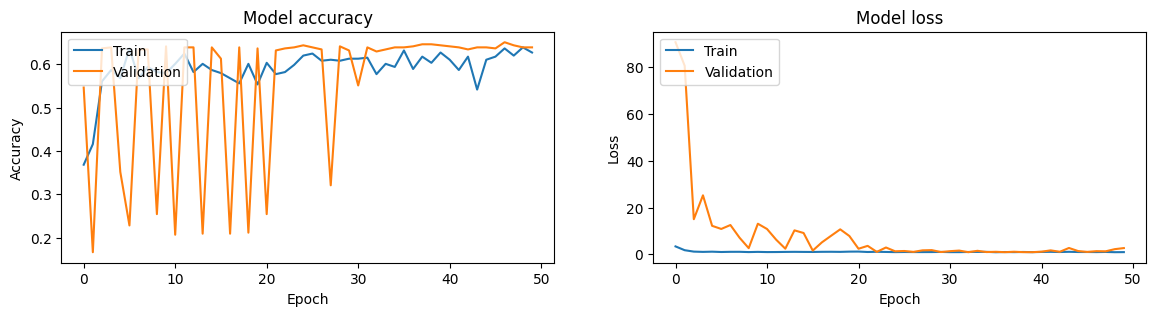

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  

plt.show()

## Transfer Learning using VGG16

In [1]:
from keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.summary()    

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 258s 4us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
vgg_features_train = base_model.predict(train_generator)
vgg_features_val = base_model.predict(val_generator)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 8s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step


In [26]:
vgg_features_train.shape

(421, 4, 4, 512)

In [27]:
vgg_features_val.shape

(421, 4, 4, 512)

In [34]:
flattened_vgg_features_train = vgg_features_train.reshape(vgg_features_train.shape[0], -1)
flattened_vgg_features_val = vgg_features_val.reshape(vgg_features_val.shape[0], -1)
flattened_vgg_features_train.shape

(421, 8192)

In [15]:
from keras.utils import to_categorical

train_labels_encoded = to_categorical(train_generator.labels)
val_labels_encoded = to_categorical(val_generator.labels)

In [16]:
train_labels_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [17]:
val_labels_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [39]:
model2 = Sequential()

model2.add(Flatten(input_shape=(8192, )))  # Input shape should match the shape of flattened_vgg_features_train and flattened_vgg_features_val

model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())

model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())

model2.add(Dense(3, activation='softmax'))



model2 = tf.keras.models.Sequential([
    Flatten(input_shape=(8192,)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(3, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# Print model summary
model2.summary()

# Enable eager execution
tf.config.run_functions_eagerly(True)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,248,867 (16.21 MB)

 Trainable params: 4,247,643 (16.20 MB)

 Non-trainable params: 1,224 (4.78 KB)

In [40]:
history2 = model2.fit(flattened_vgg_features_train, train_labels_encoded,
                      epochs=20, batch_size=128,
                      validation_data=(flattened_vgg_features_val, val_labels_encoded))

Epoch 1/20


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.3104 - loss: 1.8915 - val_accuracy: 0.4442 - val_loss: 1.2220
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.6125 - loss: 0.9197 - val_accuracy: 0.4656 - val_loss: 1.1377
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.7693 - loss: 0.6001 - val_accuracy: 0.5748 - val_loss: 1.2800
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.8071 - loss: 0.4766 - val_accuracy: 0.6033 - val_loss: 1.4892
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.8536 - loss: 0.4042 - val_accuracy: 0.5368 - val_loss: 1.5787
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.8968 - loss: 0.3177 - val_accuracy: 0.4537 - val_loss: 1.6156
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9477 - loss: 0.2268 - val_accuracy: 0.4299 - val_loss: 1.6200
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.9635 - loss: 0.2008 - val_accuracy: 0.4561 - val_loss: 1.6311
Epo

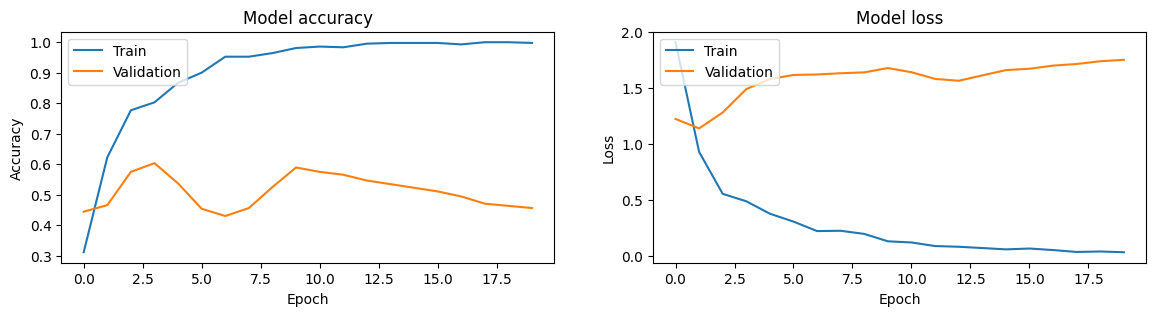

In [41]:
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])  
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  

plt.show()

In [46]:
from keras.models import load_model

model.save('dl/CNN_model.h5')
model.save('dl/VGG16_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


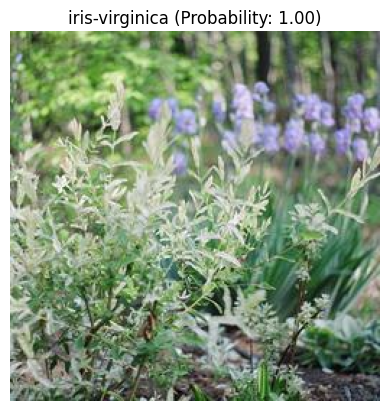

In [52]:
import random
import os
from glob import glob
from keras.preprocessing import image

model = load_model('Lab5/VGG16_model.h5')

iris_folder = 'IRIS (1)/'

class_folders = glob(os.path.join(iris_folder, '*'))

random_class = random.choice(class_folders)

image_paths = glob(os.path.join(random_class, '*.jpg'))

random_image_path = random.choice(image_paths)

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

preprocessed_image = preprocess_image(random_image_path)

predictions = model.predict(preprocessed_image)

predicted_class = np.argmax(predictions)

predicted_class_name = os.path.basename(random_class)
probability_score = predictions[0][predicted_class]

img = image.load_img(random_image_path)
plt.imshow(img)
plt.title(f"{predicted_class_name} (Probability: {probability_score:.2f})")
plt.axis('off')
plt.show()

